In [1]:
import sys
import numpy as np
import pandas as pd
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools, QED, Descriptors, rdMolDescriptors
%matplotlib inline
print(rdBase.rdkitVersion)

2021.03.4


111178


,zinc_id,smiles,ID,ROMol
0,ZINC000245189325,O=P(=O)O,,
1,ZINC000029747110,COc1cccc2c1[C@@H]1CN(CCCCn3c(O)nc4c(sc5ncc(-c6...,,
2,ZINC000137550338,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,,
3,ZINC000137550409,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,,
4,ZINC000137550489,CN(C)c1cc(CNCC(C)(C)C)c(O)c2c1C[C@H]1C[C@H]3[C...,,

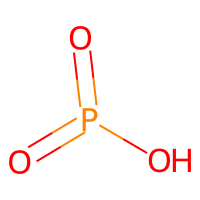
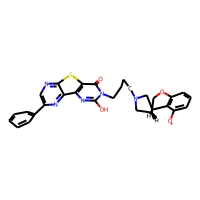
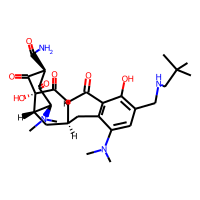
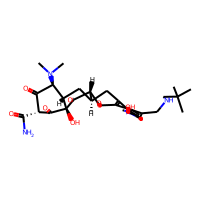
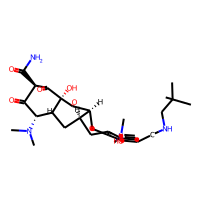

In [2]:
df = PandasTools.LoadSDF('/home/huabei/soft_folder/smtr_data/Dock/SM/in-man.sdf')
print(len(df))
df.head()

,zinc_id,ROMol
0,ZINC000245189325,
1,ZINC000029747110,
2,ZINC000137550338,
3,ZINC000137550409,
4,ZINC000137550489,

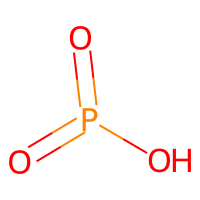
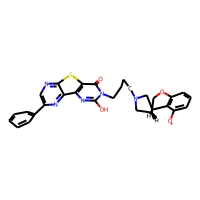
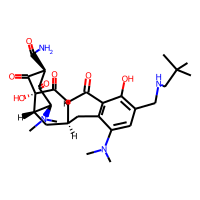
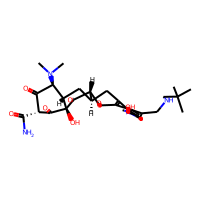
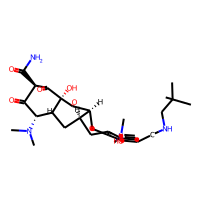

In [3]:
data = df[['zinc_id', 'ROMol']]
data.head()

In [4]:
#Lipinski: Rule of five
def rule_of_five(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    psa = Descriptors.TPSA(m)
    if (mw <= 500 and logp <= 5 and hbd <= 5 and hba <= 10):
        return 1
    else:
        return 0

In [5]:
#Rule of Four
def rule_of_four(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    rings = AllChem.CalcNumRings(m)
    if (mw >= 400 and logp >= 4 and rings >= 4 and hba >= 4):
        return 1
    else:
        return 0

In [6]:
#Rule of three
def rule_of_three(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    if (mw <= 300 and logp <= 3 and hbd <= 3 and hba <= 3 and rotatable_bonds <= 3):
        return 1
    else:
        return 0

In [7]:
#Ghose Filter
def ghose_filter(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    NumAtoms= Chem.rdchem.Mol.GetNumAtoms(m)
    mol_refractivity = Chem.Crippen.MolMR(m)
    if (mw >= 160 and mw <= 480 and logp >= 0.4 and logp <= 5.6 and NumAtoms >= 20 and NumAtoms <= 70 and mol_refractivity >= 40 and mol_refractivity <= 130):
        return 1
    else:
        return 0

In [8]:
# Veber Filter
def veber_filter(m):
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    psa = Descriptors.TPSA(m)
    if (rotatable_bonds <= 10 and psa <= 140):
        return 1
    else:
        return 0

In [9]:
# REOS Filter
def reos_filter(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    rotatable_bonds = Descriptors.NumRotatableBonds(m)
    formal_charge = Chem.rdmolops.GetFormalCharge(m)
    NumHeavyAtom = Chem.rdchem.Mol.GetNumHeavyAtoms(m)
    rings = AllChem.CalcNumRings(m)
    if (mw >= 200 and mw <= 500 and logp >= int(0 - 5) and logp <= 5 and hbd >= 0 and hbd <= 5 and hba >= 0 and hba <= 10 and 
        formal_charge >= int(0-2) and formal_charge <= 2 and rotatable_bonds >= 0 and rotatable_bonds <= 8 and NumHeavyAtom >= 15 and NumHeavyAtom <= 50):
        return 1
    else:
        return 0         

/tmp/ipykernel_16418/535821197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ro3'] = data.ROMol.map(rule_of_three)


,zinc_id,ROMol,Ro3,Ro4,Lipinski,Ghose Filter,Veber Filter,REOS Filter,QED
0,ZINC000245189325,,1,0,1,0,1,0,0.418536
1,ZINC000029747110,,0,1,0,0,1,0,0.289220
2,ZINC000137550338,,0,0,0,0,0,0,0.351637
3,ZINC000137550409,,0,0,0,0,0,0,0.351637
4,ZINC000137550489,,0,0,0,0,0,0,0.351637

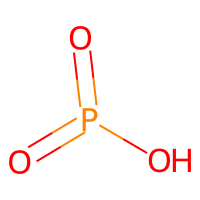
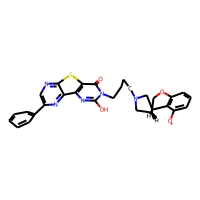
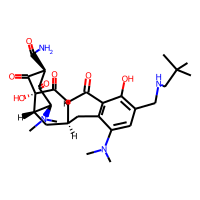
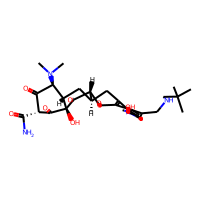
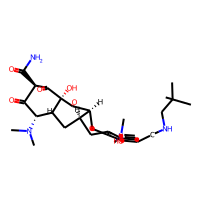

In [10]:
data['Ro3'] = data.ROMol.map(rule_of_three)
data['Ro4'] = data.ROMol.map(rule_of_four)
data['Lipinski'] = data.ROMol.map(rule_of_five)
data['Ghose Filter'] = data.ROMol.map(ghose_filter)
data["Veber Filter"] = data.ROMol.map(veber_filter)
data["REOS Filter"] = data.ROMol.map(reos_filter)
data['QED'] = data.ROMol.map(QED.qed)

data.head()

,zinc_id,ROMol,Ro3,Ro4,Lipinski,Ghose Filter,Veber Filter,REOS Filter,QED
1,ZINC000029747110,,0,1,0,0,1,0,0.289220
2,ZINC000137550338,,0,0,0,0,0,0,0.351637
3,ZINC000137550409,,0,0,0,0,0,0,0.351637
4,ZINC000137550489,,0,0,0,0,0,0,0.351637
6,ZINC000137550260,,0,0,0,0,0,0,0.351637

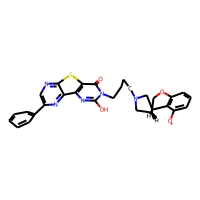
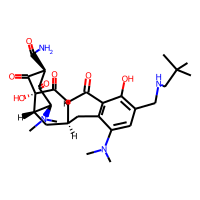
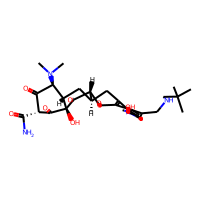
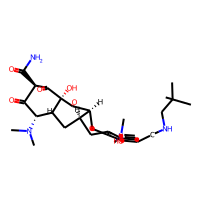
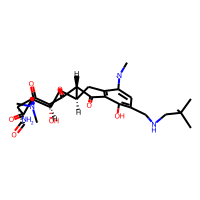

In [12]:
test_num = [54454, 59895, 53032, 54392, 67817, 29115, 49405, 59608, 25151, 2363, 59505, 48266, 44595, 59093, 58584, 83669, 42200, 57231, 32075, 69364]
test_num = [i-1 for i in test_num]
test_data = data.iloc[test_num]
no_Lipinski_data = data.loc[data['Lipinski']==0]
no_Lipinski_index =  no_Lipinski_data.index
no_Lipinski_data.head()

In [13]:
no_Lipinski_index[1]
import pickle
with open('in-man-no-lipinski-index-list.pkl', 'wb') as f:
    pickle.dump(no_Lipinski_index, f, pickle.HIGHEST_PROTOCOL)


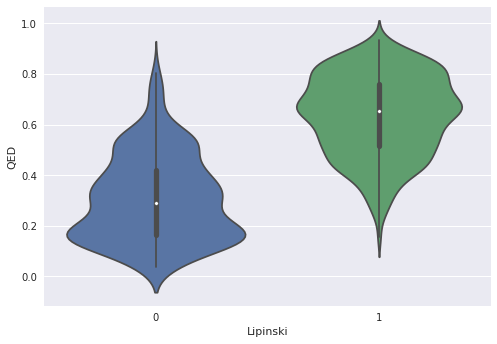

In [12]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Lipinski', y='QED', data=data)

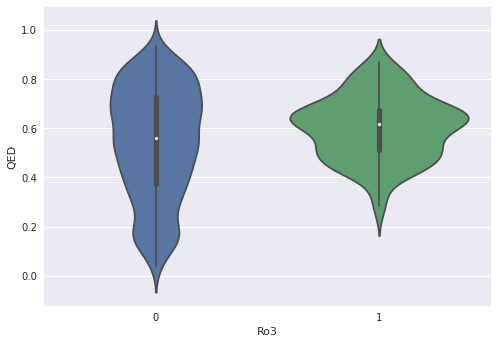

In [13]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Ro3', y='QED', data=data)

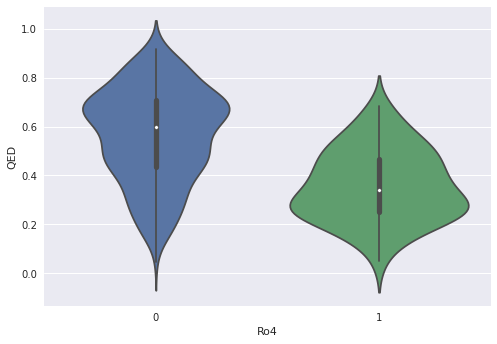

In [13]:
import matplotlib as mpl
import seaborn as sns
with mpl.style.context('seaborn'):
    sns.violinplot(x='Ro4', y='QED', data=data)

In [1]:
from collections import namedtuple

In [2]:
Point = namedtuple('Point',"x y")

In [5]:
import pandas as pd
pd.DataFrame([Point(1, 2), (3, 4)])

,x,y
0,1,2
1,3,4
